In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cardekho_imputated.csv')

df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [3]:
df.drop(['car_name','brand'], axis=1, inplace=True)

In [4]:
df.head()

,Unnamed: 0,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['model'] = le.fit_transform(X['model'])

In [7]:
X.head()

,Unnamed: 0,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,0,7,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,1,54,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,2,118,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,3,7,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,4,38,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [8]:
cat_features = X.select_dtypes(include='object').columns
neumeric_features = X.select_dtypes(exclude='object').columns


In [9]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
ohe = OneHotEncoder(
    drop='first',
    # sparse=False
)

preprocessor = ColumnTransformer(
    [
        ('Standard Scaler',scaler,neumeric_features),
        ('One Hot Encoding',ohe,cat_features)
    ],
    remainder='passthrough'
)

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [12]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.780875,1.255968,0.323969,0.349100,-2.050819,1.756765,2.681685,-0.403824,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.434348,0.789199,-1.337798,-1.069394,0.985661,-0.547081,-0.382744,-0.403824,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.600214,-1.242618,-1.337798,-1.163564,-0.177042,0.893542,3.296910,-0.403824,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.669561,-1.022962,0.323969,0.178369,-0.465315,0.024564,0.396229,-0.403824,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.659017,1.503081,1.321030,0.585469,0.149668,-0.550917,-0.502047,-0.403824,0.0,0.0,0.0,0.0,0.0,1.0,1.0


<Axes: >

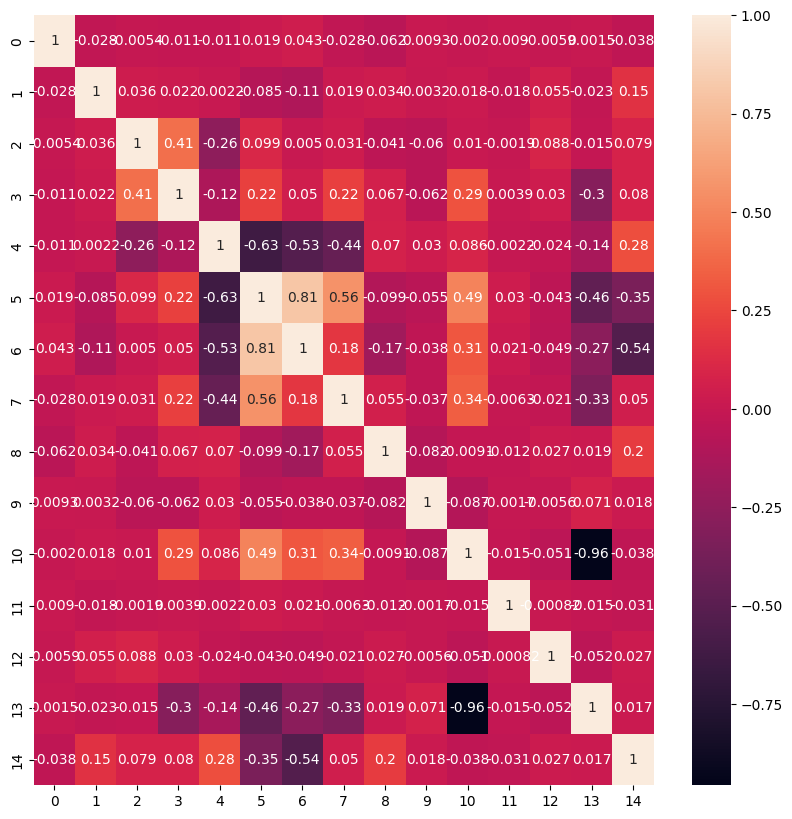

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(X_train).corr(),annot=True)

In [14]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [15]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(models,X_train,y_train,X_test,y_test):
    for name,model in models.items():
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print(f'Model: {name}')
        print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred)}')
        print(f'Model Accuracy: {r2_score(y_test,y_pred)*100}%')
        print(f'Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}')
        print('--------------------------------------')

In [17]:
evaluate_model(models,X_train,y_train,X_test,y_test)


Model: Linear Regression
Mean Squared Error: 252588750547.22794
Model Accuracy: 66.4459536959453%
Mean Absolute Error: 279686.64791726676
--------------------------------------
Model: Lasso
Mean Squared Error: 252587878836.0478
Model Accuracy: 66.44606949459919%
Mean Absolute Error: 279682.80261406803
--------------------------------------
Model: Ridge
Mean Squared Error: 252579622032.31958
Model Accuracy: 66.44716633352816%
Mean Absolute Error: 279625.3972928501
--------------------------------------
Model: ElasticNet
Mean Squared Error: 290210786264.42773
Model Accuracy: 61.448219134240475%
Mean Absolute Error: 247603.87349372145
--------------------------------------
Model: Random Forest
Mean Squared Error: 55880712014.085304
Model Accuracy: 92.57677155311958%
Mean Absolute Error: 98365.4768083036
--------------------------------------


KeyboardInterrupt: 

In [ ]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

linear_params = {
    'fit_intercept': [True,False],
    # 'normalize': [True,False],
    'copy_X': [True,False]
}

lasso_params = {
    'alpha': [0.1,0.5,1,2,5],
    'fit_intercept': [True,False],
    # 'normalize': [True,False],
    'copy_X': [True,False]
}

ridge_params = {
    'alpha': [0.1,0.5,1,2,5],
    'fit_intercept': [True,False],
    # 'normalize': [True,False],
    'copy_X': [True,False]
}

elastic_params = {
    'alpha': [0.1,0.5,1,2,5],
    'l1_ratio': [0.1,0.5,1],
    'fit_intercept': [True,False],
    # 'normalize': [True,False],
    'copy_X': [True,False]
}

rf_params = {
    'n_estimators': [100,200,300,400,500],
    'max_depth': [10,20,30,40,50],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

dt_params = {
    'max_depth': [10,20,30,40,50],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

In [ ]:

linear_model = GridSearchCV(LinearRegression(),param_grid=linear_params)
lasso_model = GridSearchCV(Lasso(),param_grid=lasso_params)
ridge_model = GridSearchCV(Ridge(),param_grid=ridge_params)
elastic_model = GridSearchCV(ElasticNet(),param_grid=elastic_params)
rf_model = GridSearchCV(RandomForestRegressor(),param_grid=rf_params)
dt_model = GridSearchCV(DecisionTreeRegressor(),param_grid=dt_params)


In [ ]:
linear_model.fit(X_train,y_train)
lasso_model.fit(X_train,y_train)
ridge_model.fit(X_train,y_train)
elastic_model.fit(X_train,y_train)
rf_model.fit(X_train,y_train)
dt_model.fit(X_train,y_train)


KeyboardInterrupt: 